In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import re

In [ ]:
#download the dataset and extract it to a folder named FGNET_Dataset right outside the current folder. 
train_labels = pd.read_csv("../FGNET_Dataset/Index/Train.csv")
print(train_labels.head())

   age  gender         filename  \
0    3       1  00013_00M19.JPG   
1    3       1  00013_01M19.JPG   
2    3       1  00013_02M19.JPG   
3    3       1  00022_03M19.JPG   
4    4       1  00022_04M20.JPG   

                                            filepath  
0  /kaggle/input/morph/Dataset/Images/Train/00013...  
1  /kaggle/input/morph/Dataset/Images/Train/00013...  
2  /kaggle/input/morph/Dataset/Images/Train/00013...  
3  /kaggle/input/morph/Dataset/Images/Train/00022...  
4  /kaggle/input/morph/Dataset/Images/Train/00022...  


In [3]:
def extract_person_id(filename):
    match = re.match(r"(\d+)_", filename)
    return match.group(1) if match else filename

train_labels["person_id"] = train_labels["filename"].apply(extract_person_id)

In [4]:
train_labels.head()

,age,gender,filename,filepath,person_id
0,3,1,00013_00M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...,00013
1,3,1,00013_01M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...,00013
2,3,1,00013_02M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00013...,00013
3,3,1,00022_03M19.JPG,/kaggle/input/morph/Dataset/Images/Train/00022...,00022
4,4,1,00022_04M20.JPG,/kaggle/input/morph/Dataset/Images/Train/00022...,00022


In [5]:
# Group by person_id and calculate the age difference and file count
grouped = train_labels.groupby('person_id').agg(
    age_diff=('age', lambda x: x.max() - x.min()),
    file_count=('filename', 'count')
).reset_index()

In [6]:
# Filter the grouped dataframe to include only people with more than 1 photo
filtered_grouped = grouped[grouped['file_count'] > 1]

# Initialize a dictionary to store the results
age_diff_stats = {}

# Calculate the average age difference for each n in the range of 2 to 40
for n in range(2, 40):
    subset = filtered_grouped[filtered_grouped['file_count'] == n]
    if not subset.empty:
        avg_age_diff = subset['age_diff'].mean()
        age_diff_stats[n] = avg_age_diff

# Print the statistics
for n, avg_age_diff in age_diff_stats.items():
    print(f"Number of photos: {n}, Average age difference: {avg_age_diff:.2f}")

Number of photos: 2, Average age difference: 0.99
Number of photos: 3, Average age difference: 1.61
Number of photos: 4, Average age difference: 2.00
Number of photos: 5, Average age difference: 2.20
Number of photos: 6, Average age difference: 2.52
Number of photos: 7, Average age difference: 2.63
Number of photos: 8, Average age difference: 2.71
Number of photos: 9, Average age difference: 3.33
Number of photos: 10, Average age difference: 2.67
Number of photos: 11, Average age difference: 2.80
Number of photos: 12, Average age difference: 2.74
Number of photos: 13, Average age difference: 3.25
Number of photos: 14, Average age difference: 2.17
Number of photos: 15, Average age difference: 5.50
Number of photos: 16, Average age difference: 4.60
Number of photos: 17, Average age difference: 3.00
Number of photos: 18, Average age difference: 3.67
Number of photos: 19, Average age difference: 4.75
Number of photos: 20, Average age difference: 6.50
Number of photos: 21, Average age diffe

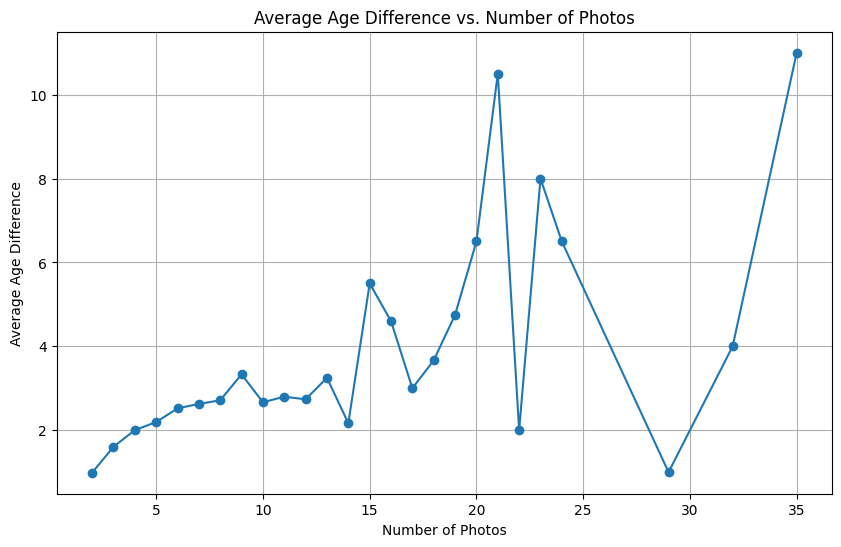

In [7]:
# Convert the age_diff_stats dictionary to a DataFrame
age_diff_df = pd.DataFrame(list(age_diff_stats.items()), columns=['Number of Photos', 'Average Age Difference'])

# Plot the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(age_diff_df['Number of Photos'], age_diff_df['Average Age Difference'], marker='o')
plt.xlabel('Number of Photos')
plt.ylabel('Average Age Difference')
plt.title('Average Age Difference vs. Number of Photos')
plt.grid(True)
plt.show()

In [8]:
# Filter the DataFrame to include only people with at least 2 photos
at_least_2_photos = filtered_grouped[filtered_grouped['file_count'] >= 2]

# Calculate the average age difference
avg_age_diff_at_least_2_photos = at_least_2_photos['age_diff'].mean()

print(f"The average age difference for anyone with at least 2 photos is: {avg_age_diff_at_least_2_photos:.2f}")

The average age difference for anyone with at least 2 photos is: 1.46


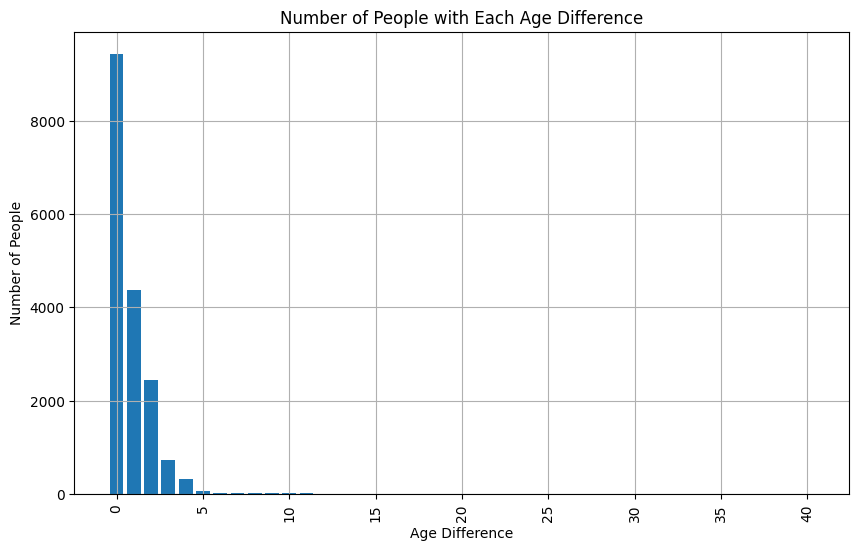

In [9]:
# Group by age_diff and count the number of people for each age difference
age_diff_counts = grouped['age_diff'].value_counts().sort_index()

# Plot the number of people with each age difference
plt.figure(figsize=(10, 6))
plt.bar(age_diff_counts.index, age_diff_counts.values)
plt.xlabel('Age Difference')
plt.ylabel('Number of People')
plt.title('Number of People with Each Age Difference')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()